In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("insurance.csv")

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df.shape

(1338, 7)

In [16]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Data Analysis (EDA)

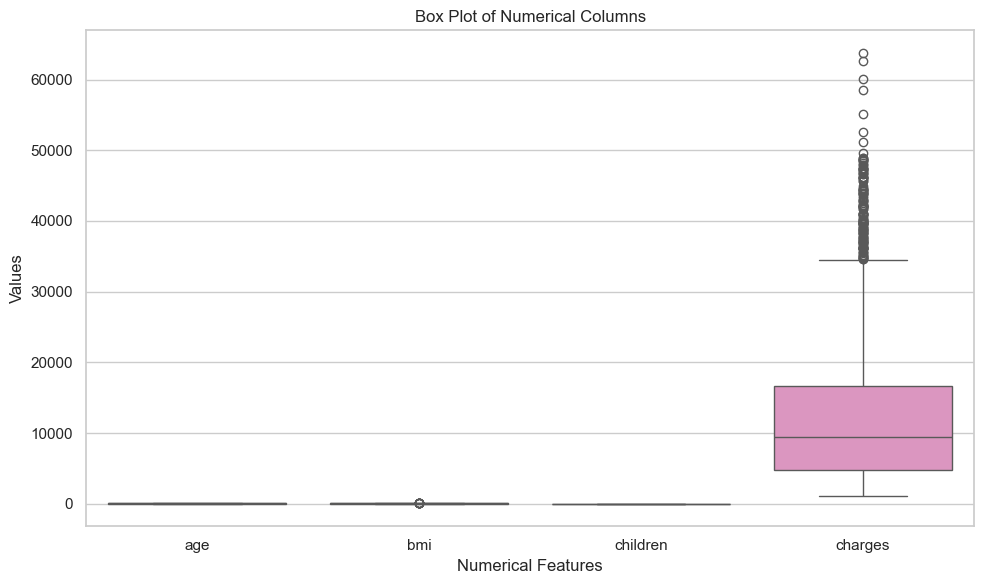

In [20]:
# Set style
sns.set(style="whitegrid")

# Select and melt numerical columns
numerical_cols = ['age', 'bmi', 'children', 'charges']
df_melted = df[numerical_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', hue='Variable', data=df_melted, palette='Set2', legend=False)
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Numerical Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [21]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Apply to selected numerical columns
numerical_cols = ['bmi', 'charges']
df_cleaned = remove_outliers_iqr(df, numerical_cols)

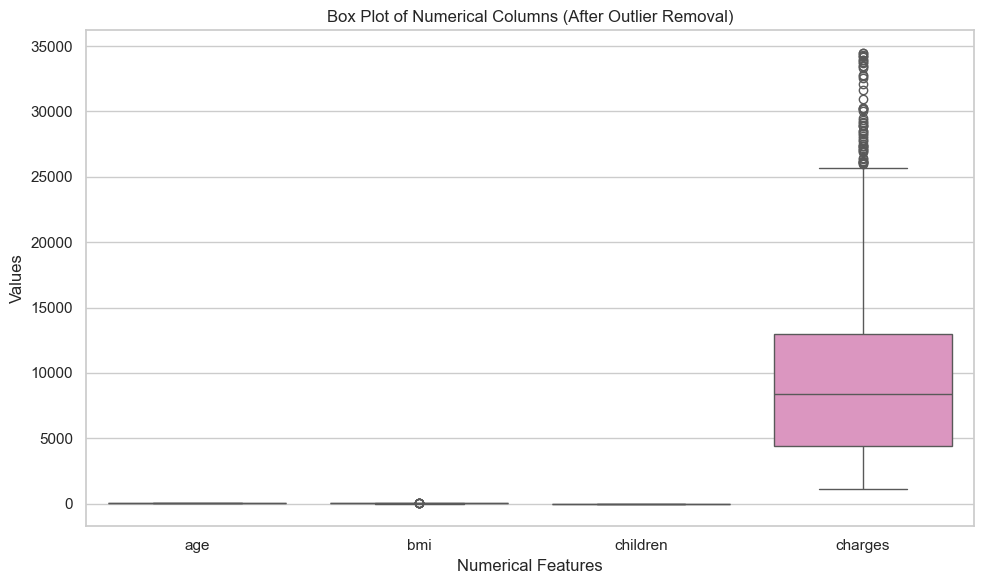

In [22]:
# Set style
sns.set(style="whitegrid")

# Select and melt numerical columns
numerical_cols = ['age', 'bmi', 'children', 'charges']
df_melted_clean = df_cleaned[numerical_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', hue='Variable', data=df_melted_clean, palette='Set2', legend=False)
plt.title('Box Plot of Numerical Columns (After Outlier Removal)')
plt.xlabel('Numerical Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [23]:
# Check shape before and after
print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)

Original shape: (1338, 7)
After outlier removal: (1193, 7)


In [28]:
# Get summary statistics
df_cleaned.describe()

,age,bmi,children,charges
count,1193.000000,1193.000000,1193.000000,1193.000000
mean,38.981559,29.998529,1.085499,9942.269682
std,14.063482,5.866873,1.216249,7251.326564
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4415.158800
50%,39.000000,29.735000,1.000000,8410.046850
75%,51.000000,33.770000,2.000000,12979.358000
max,64.000000,46.750000,5.000000,34472.841000


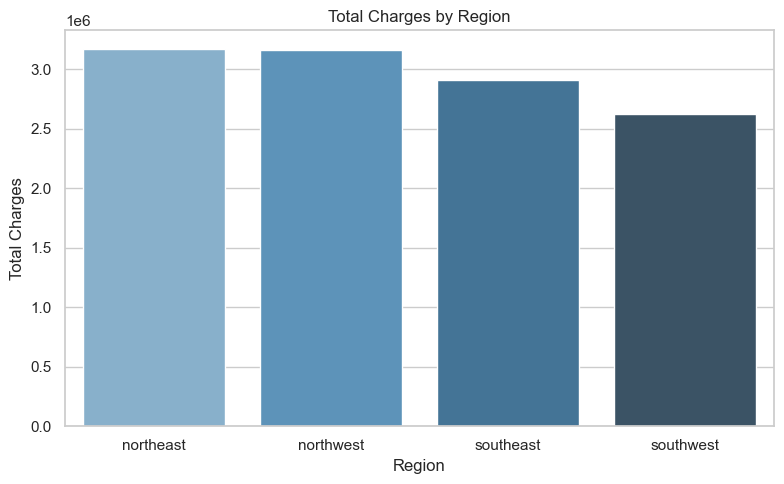

In [32]:
# Calculate total charges by region
charges_by_region = df_cleaned.groupby('region')['charges'].sum().reset_index()

# Plot bar chart with future-proof handling
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='charges', hue='region', data=charges_by_region, palette='Blues_d', legend=False)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.title('Total Charges by Region')
plt.tight_layout()
plt.show()

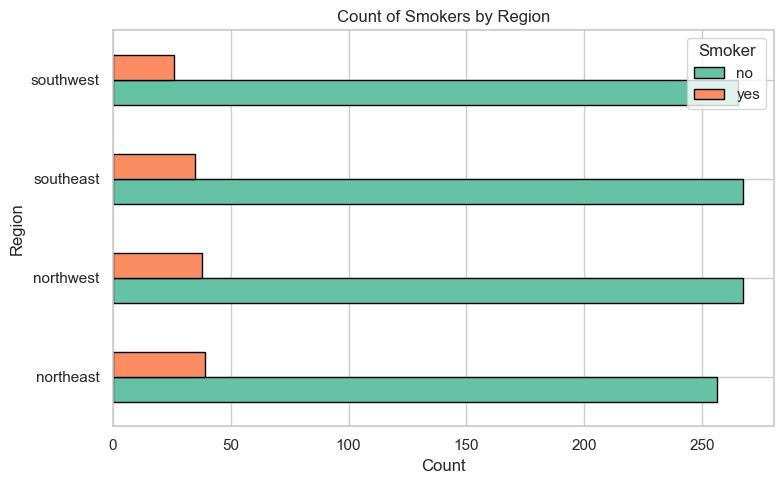

In [36]:
# Prepare data
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)

# Plot horizontal stacked bar chart
colors = ['#66c2a5', '#fc8d62']  # Custom colors for 'no' and 'yes'
smokers_by_region[['no', 'yes']].plot(
    kind='barh',
    color=colors,
    figsize=(8, 5),
    edgecolor='black'
)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.tight_layout()
plt.show()

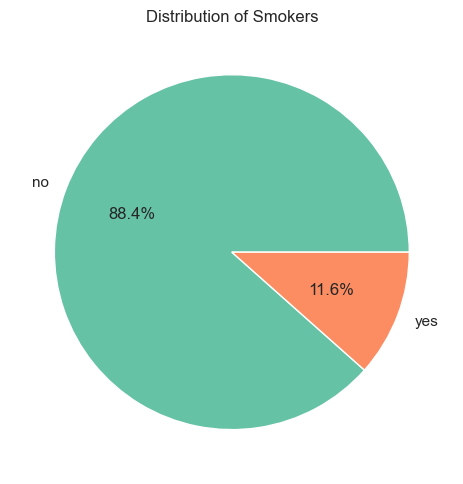

In [42]:
# Set plot style
sns.set(style="whitegrid")

# Prepare data
smoker_counts = df_cleaned['smoker'].value_counts()

# Custom colors
colors = ['#66c2a5', '#fc8d62']  # 'no', 'yes'

# Plot pie chart
plt.figure(figsize=(6, 5))
plt.pie(
    smoker_counts,
    labels=smoker_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Distribution of Smokers')
plt.tight_layout()
plt.show()

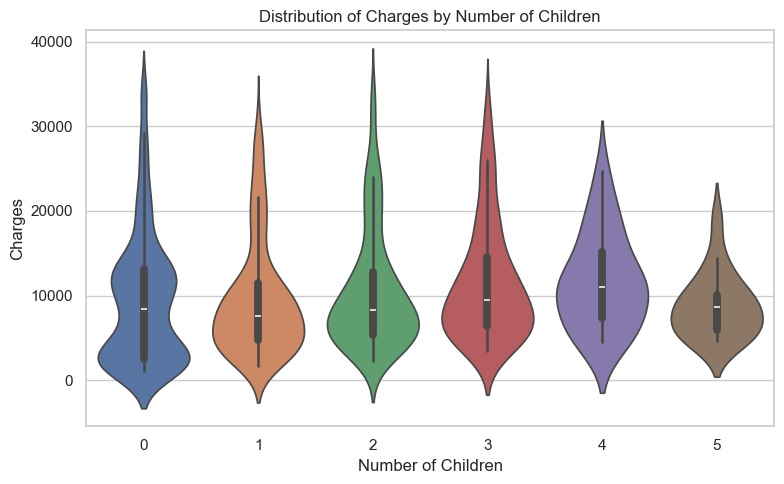

In [48]:
# Create violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(
    x='children',
    y='charges',
    hue='children',
    data=df_cleaned,
    palette='deep',
    inner='box',
    legend=False
)

# Set labels and title
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Distribution of Charges by Number of Children')
plt.tight_layout()
plt.show()

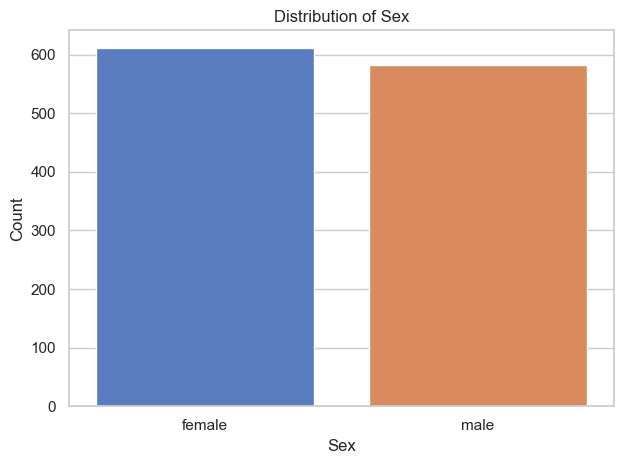

In [56]:
# Create countplot
sns.countplot(x='sex', hue='sex', data=df_cleaned, palette='muted', legend=False)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.tight_layout()
plt.show()

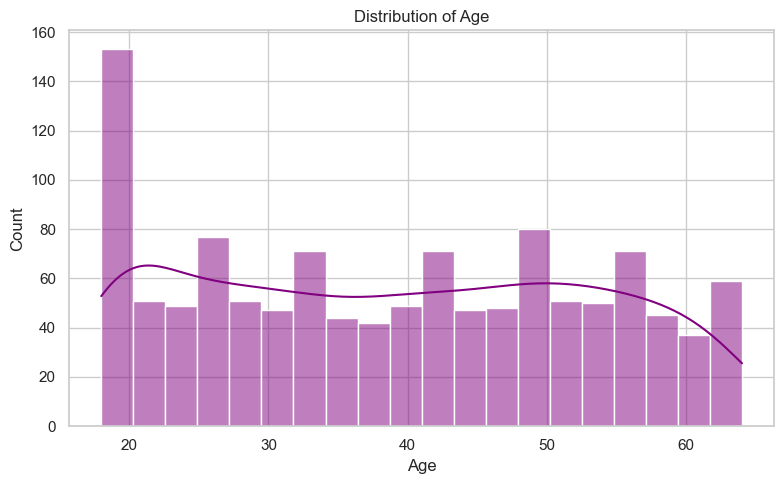

In [69]:
# Plot histogram of age
plt.figure(figsize=(8, 5))
sns.histplot(data=df_cleaned, x='age', bins=20, color='purple', kde=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.tight_layout()
plt.show()

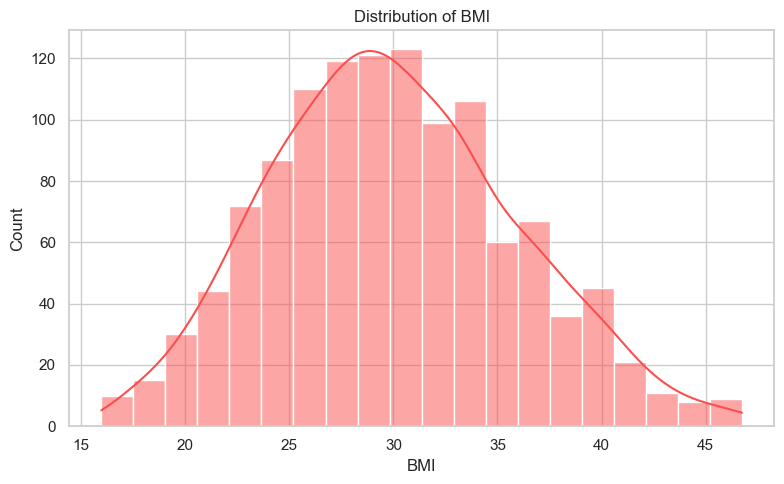

In [67]:
# Plot histogram of BMI
plt.figure(figsize=(8, 5))
sns.histplot(data=df_cleaned, x='bmi', bins=20, color='#fc4e4e', kde=True)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.tight_layout()
plt.show()

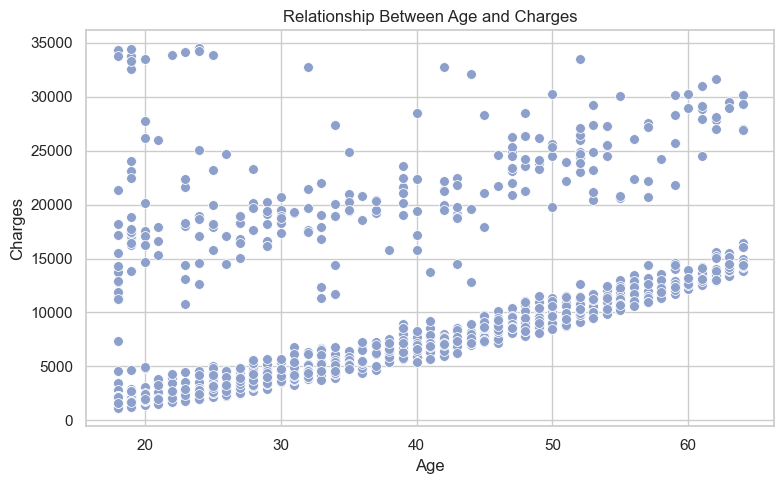

In [72]:
# Scatter plot: Age vs Charges
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='age', y='charges', color='#8da0cb', edgecolor='white', s=50)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship Between Age and Charges')
plt.tight_layout()
plt.show()

There is a clear upward trend between age and insurance charges, indicating that older individuals tend to incur higher charges.

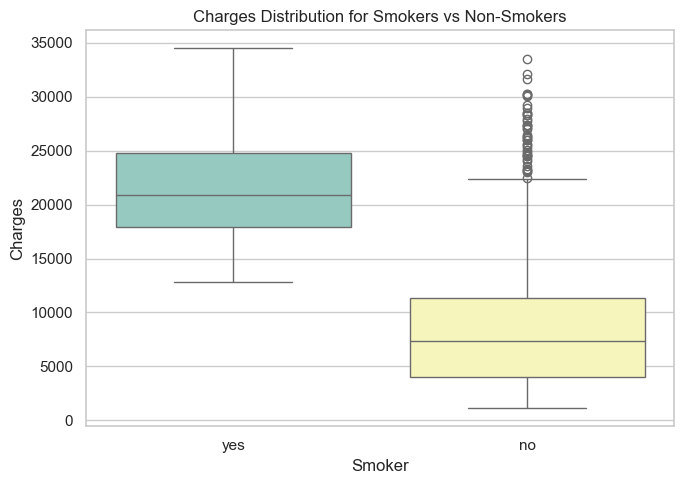

In [78]:
# Boxplot: Charges by Smoker Status
plt.figure(figsize=(7, 5))
sns.boxplot(
    x='smoker',
    y='charges',
    hue='smoker',
    data=df_cleaned,
    palette='Set3',
    legend=False
)

# Add labels and title
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers vs Non-Smokers')
plt.tight_layout()
plt.show()

There is a substantial difference in insurance charges, with smokers being charged considerably more than non-smokers.

## Feature Engineering

### Creating new feature such as Age groups

In [83]:
# Create age groups with improvements
df_cleaned['age_group'] = pd.cut(
    df_cleaned['age'],
    bins=[0, 25, 40, 60, df_cleaned['age'].max()],
    labels=['Young', 'Adult', 'Middle-aged', 'Senior'],
    include_lowest=True  # Ensures the lowest age value is included
)

# View a sample
df_cleaned.sample(5)

,age,sex,bmi,children,smoker,region,charges,age_group
1178,23,female,34.865,0,no,northeast,2899.48935,Young
232,19,female,17.800,0,no,southwest,1727.78500,Young
248,19,male,20.900,1,no,southwest,1832.09400,Young
466,60,female,28.700,1,no,southwest,13224.69300,Middle-aged
943,19,male,22.610,0,no,northwest,1628.47090,Young


In [84]:
# Check counts
print(df_cleaned['age_group'].value_counts())

age_group
Middle-aged    481
Adult          355
Young          279
Senior          78
Name: count, dtype: int64


### Feature encoding - Handling categorical variables

In [85]:
from sklearn.preprocessing import LabelEncoder

# Step 1: One-hot encode 'region'
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region', dtype=int)

# Step 2: Label encode 'smoker' and 'sex'
le_smoker = LabelEncoder()
le_sex = LabelEncoder()

df_encoded['smoker_encoded'] = le_smoker.fit_transform(df_encoded['smoker'])  # 'yes' = 1, 'no' = 0
df_encoded['sex_encoded'] = le_sex.fit_transform(df_encoded['sex'])          # 'male' = 1, 'female' = 0

df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
618,19,female,33.11,0,yes,34439.85590,Young,0,0,1,0,1,0
1080,18,male,21.78,2,no,11884.04858,Young,0,0,1,0,0,1
101,30,male,25.46,0,no,3645.08940,Adult,1,0,0,0,0,1
822,18,female,31.13,0,no,1621.88270,Young,0,0,1,0,0,0
413,25,male,23.90,5,no,5080.09600,Young,0,0,0,1,0,1


## Correlation Analysis

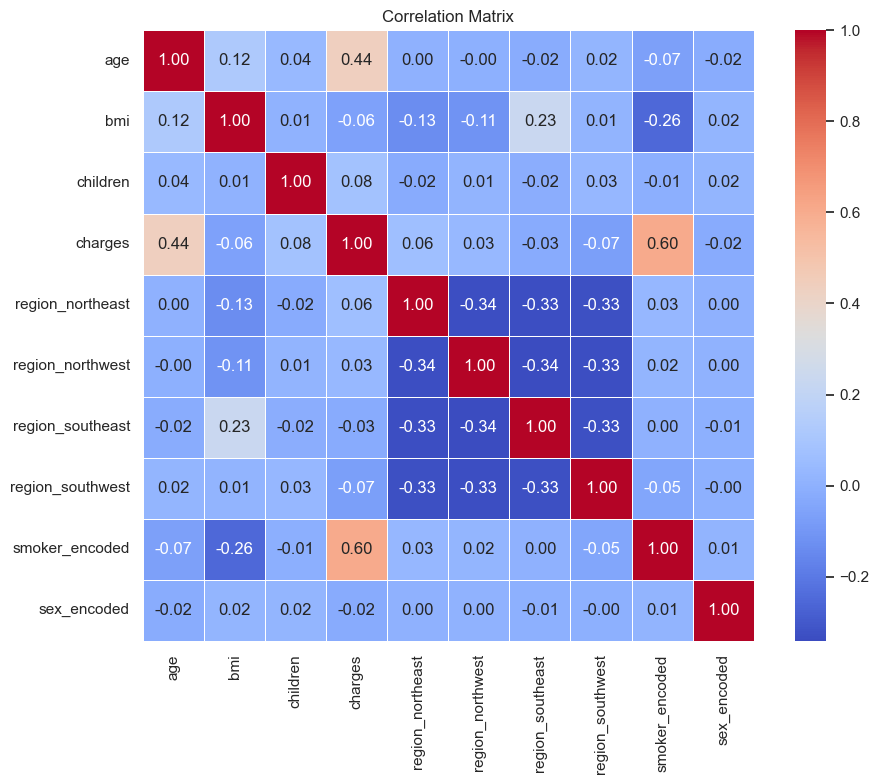

✅ Relevant features based on correlation with 'charges':
['age', 'smoker_encoded']


In [91]:
# Step 1: Include all numeric types including int64, float64, uint8, etc.
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Step 2: Compute correlation matrix
corr_matrix = df_encoded[numeric_cols].corr()

# Step 3: Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Step 4: Identify features with correlation > threshold with target 'charges'
threshold = 0.3
relevant_features = corr_matrix.loc[
    (corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')
].index.tolist()

# Display relevant features
print("✅ Relevant features based on correlation with 'charges':")
print(relevant_features)

Correlation analysis indicates that `age` and `smoker_encoded` are the most informative features for predicting `charges`, making them strong candidates for model input.

## Model Building and Evaluation

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [94]:
# Define features and target variable
X = df_encoded[['age', 'smoker_encoded']]  # Based on correlation analysis
y = df_encoded['charges']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

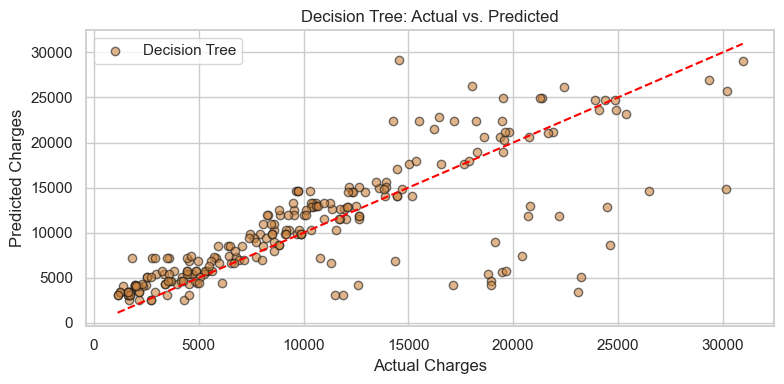

Decision Tree Results:
  Mean Squared Error: 19994952.54
  Mean Absolute Error: 2757.66



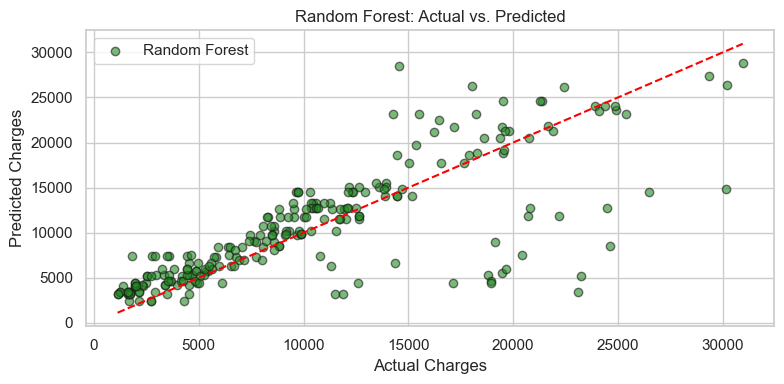

Random Forest Results:
  Mean Squared Error: 19946316.36
  Mean Absolute Error: 2749.04



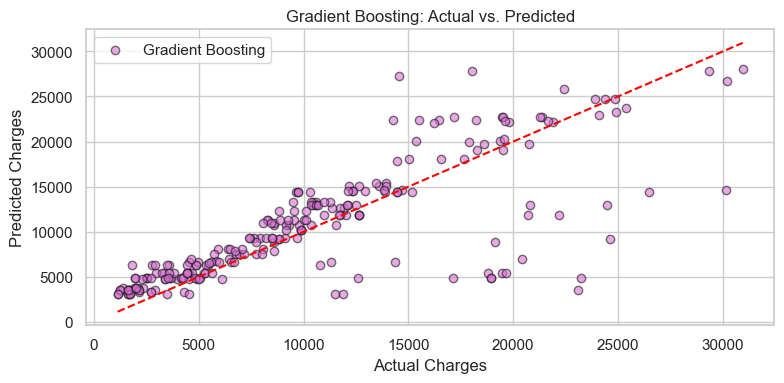

Gradient Boosting Results:
  Mean Squared Error: 19405842.52
  Mean Absolute Error: 2694.16



In [98]:
# Helper function to evaluate and plot model performance
def evaluate_model(model, X_train, y_train, X_test, y_test, color, label):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    # Plot actual vs predicted
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, predictions, color=color, label=label, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f'{label}: Actual vs. Predicted')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"{label} Results:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  Mean Absolute Error: {mae:.2f}\n")
    return mse, mae

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_mse, dt_mae = evaluate_model(dt_model, X_train, y_train, X_test, y_test, color='peru', label='Decision Tree')

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_mse, rf_mae = evaluate_model(rf_model, X_train, y_train, X_test, y_test, color='forestgreen', label='Random Forest')

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_mse, gb_mae = evaluate_model(gb_model, X_train, y_train, X_test, y_test, color='orchid', label='Gradient Boosting')

## Feature Importance

In [99]:
# Helper function to display feature importances
def print_feature_importance(model, feature_names, model_name):
    print(f"{model_name} Feature Importances:")
    importances = model.feature_importances_
    for feature, importance in zip(feature_names, importances):
        print(f"  {feature}: {importance:.4f}")
    print()

# Call for each model
print_feature_importance(dt_model, X.columns, "Decision Tree")
print_feature_importance(rf_model, X.columns, "Random Forest")
print_feature_importance(gb_model, X.columns, "Gradient Boosting")

Decision Tree Feature Importances:
  age: 0.4334
  smoker_encoded: 0.5666

Random Forest Feature Importances:
  age: 0.4569
  smoker_encoded: 0.5431

Gradient Boosting Feature Importances:
  age: 0.4291
  smoker_encoded: 0.5709



Across all three models, smoking status emerged as the most influential feature, with a greater importance score than age. This highlights its strong predictive power in determining insurance charges.

## Inference on Unseen Input

In [102]:
# Sample input data
new_data = pd.DataFrame({
    'age': [25],
    'smoker_encoded': [0]  # 1 = smoker, 0 = non-smoker
})

# Make predictions using trained models
dt_pred = dt_model.predict(new_data)
rf_pred = rf_model.predict(new_data)
gb_pred = gb_model.predict(new_data)

# Print results clearly
print("📌 Predicted Insurance Charges for a 25-year-old non-smoker:")
print(f"  Decision Tree:      ₹{dt_pred[0]:,.2f}")
print(f"  Random Forest:      ₹{rf_pred[0]:,.2f}")
print(f"  Gradient Boosting:  ₹{gb_pred[0]:,.2f}")

📌 Predicted Insurance Charges for a 25-year-old non-smoker:
  Decision Tree:      ₹5,135.04
  Random Forest:      ₹5,208.07
  Gradient Boosting:  ₹4,831.61


In [105]:
# Sample input data
new_data = pd.DataFrame({
    'age': [31],
    'smoker_encoded': [1]  # 1 = smoker, 0 = non-smoker
})

# Make predictions using trained models
dt_pred = dt_model.predict(new_data)
rf_pred = rf_model.predict(new_data)
gb_pred = gb_model.predict(new_data)

# Print results clearly
print("📌 Predicted Insurance Charges for a 31-year-old smoker:")
print(f"  Decision Tree:      ₹{dt_pred[0]:,.2f}")
print(f"  Random Forest:      ₹{rf_pred[0]:,.2f}")
print(f"  Gradient Boosting:  ₹{gb_pred[0]:,.2f}")

📌 Predicted Insurance Charges for a 31-year-old smoker:
  Decision Tree:      ₹19,275.16
  Random Forest:      ₹19,190.37
  Gradient Boosting:  ₹19,103.24


In [106]:
# Sample input data
new_data = pd.DataFrame({
    'age': [46],
    'smoker_encoded': [0]  # 1 = smoker, 0 = non-smoker
})

# Make predictions using trained models
dt_pred = dt_model.predict(new_data)
rf_pred = rf_model.predict(new_data)
gb_pred = gb_model.predict(new_data)

# Print results clearly
print("📌 Predicted Insurance Charges for a 45-year-old non-smoker:")
print(f"  Decision Tree:      ₹{dt_pred[0]:,.2f}")
print(f"  Random Forest:      ₹{rf_pred[0]:,.2f}")
print(f"  Gradient Boosting:  ₹{gb_pred[0]:,.2f}")

📌 Predicted Insurance Charges for a 45-year-old non-smoker:
  Decision Tree:      ₹8,596.43
  Random Forest:      ₹8,578.38
  Gradient Boosting:  ₹9,182.23


In [107]:
# Sample input data
new_data = pd.DataFrame({
    'age': [58],
    'smoker_encoded': [1]  # 1 = smoker, 0 = non-smoker
})

# Make predictions using trained models
dt_pred = dt_model.predict(new_data)
rf_pred = rf_model.predict(new_data)
gb_pred = gb_model.predict(new_data)

# Print results clearly
print("📌 Predicted Insurance Charges for a 58-year-old smoker:")
print(f"  Decision Tree:      ₹{dt_pred[0]:,.2f}")
print(f"  Random Forest:      ₹{rf_pred[0]:,.2f}")
print(f"  Gradient Boosting:  ₹{gb_pred[0]:,.2f}")

📌 Predicted Insurance Charges for a 58-year-old smoker:
  Decision Tree:      ₹27,376.18
  Random Forest:      ₹27,179.70
  Gradient Boosting:  ₹26,769.32
